Chebyshev coefficients for $e^{-x}$ for $n=1$ from Cody, Meinardus, and Varga (table III)

```
              n = 1
---------------------------------
i   p_i             q_i
---------------------------------
0   1.0669  ( 00)   1.0000  ( 00)
1  -1.1535  (-01)   1.7275  ( 00)
```

In [1]:
from sympy import init_session
init_session()
%matplotlib inline

IPython console for SymPy 1.0 (Python 3.5.2-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/


(From `Maria_Pusa2.pdf`)

Remez algorithm

1. Assume $\left\{t_i \right\}_{i=1}^{2k+2} \subset [−1, 1]$ and find real polynomials $p_k$ and $q_k$ and a parameter $\epsilon > 0$ such
that
$$
\begin{align}
e^{\phi(t_i)} − \frac{p(\phi(t_i))}{q(\phi(t_i))} +(−1)^i\epsilon=0,&& i=1,...,2k+2,\\
\end{align}
$$
where $q_{k+1} = 1$.

2. Assume $r_{k,k} \in \pi_{k,k}$ and $\epsilon > 0$ and find the $2k + 2$ local extreme points of the function
$$
E(t) = e^{\phi(t)} - r_{k,k}(\phi(t))
$$
in the interval $[−1, 1]$.

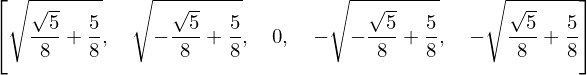

In [2]:
[chebyshevt_root(5, i) for i in range(5)]

In [3]:
[chebyshevt_root(5, i).evalf() for i in range(5)]

In [4]:
chebyshevt(5, x)

In [5]:
epsilon = symbols("epsilon")
p0, p1, q0, q1 = symbols("p0, p1, q0, q1")
i = symbols("i")

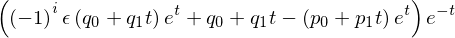

In [6]:
expr = exp(-t) - (p0 + p1*t)/(q0 + q1*t) + (-1)**i*epsilon
expr = expr*(q0 + q1*t)
expr = simplify(expr)
expr

In [7]:
system = Tuple(*[expr.subs({i: j, t: chebyshevt_root(5, 4-j).evalf()}) for j in range(1,5)])

In [8]:
system = system.subs(q0, 1)
system

In [9]:
sols = solve(system, [p0, p1, q1, epsilon], dict=True)
sols

In [10]:
E = exp(-t) - (p0 + p1*t)/(1 + q1*t)

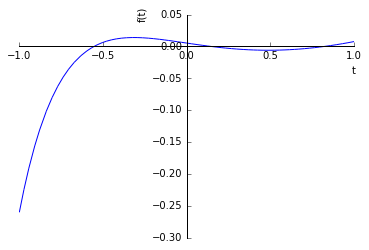

In [11]:
plot(E.subs(sols[0]), (t, -1, 1))

In [12]:
extreme_x2 = [-1, nsolve(diff(E.subs(sols[0]), t), -1), nsolve(diff(E.subs(sols[0]), t), 0), 1]
extreme_x2

[-1, mpf('0.48756333454382529'), mpf('-0.31523643012397814'), 1]

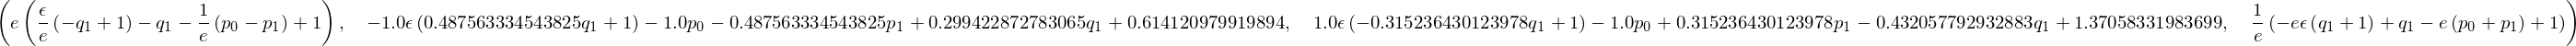

In [13]:
system2 = Tuple(*[expr.subs({i: j, t: extreme_x2[j]}) for j in range(4)]).subs(q0, 1)
system2

In [14]:
sols2 = solve(system2, [p0, p1, q1, epsilon], dict=True)
sols2

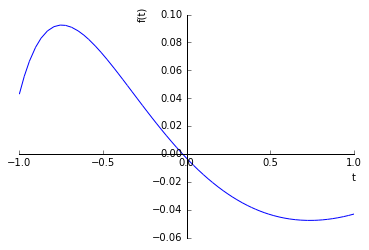

In [15]:
plot(E.subs(sols2[1]), (t, -1, 1))

In [16]:
extreme_x3 = [-1, nsolve(diff(E.subs(sols2[1]), t), -1), nsolve(diff(E.subs(sols2[1]), t), 1), 1]
extreme_x3

[-1, mpf('-0.74688544376119458'), mpf('0.73445765239847861'), 1]

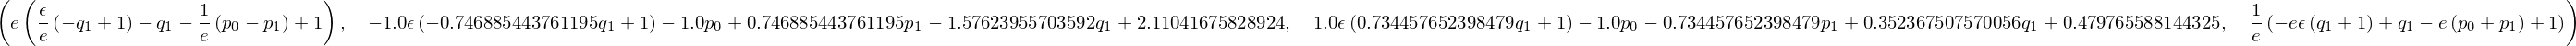

In [17]:
system3 = Tuple(*[expr.subs({i: j, t: extreme_x3[j]}) for j in range(4)]).subs(q0, 1)
system3

In [18]:
sols3 = solve(system3, [p0, p1, q1, epsilon], dict=True)
sols3

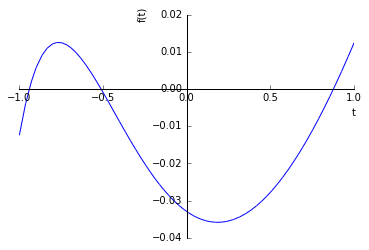

In [19]:
plot(E.subs(sols3[1]), (t, -1, 1))

In [20]:
[E.subs(sols3[1]).subs(t, i).evalf() for i in extreme_x3]

In [21]:
extreme_x4 = [-1, nsolve(diff(E.subs(sols3[1]), t), -1), nsolve(diff(E.subs(sols3[1]), t), 1), 1]
extreme_x4

[-1, mpf('-0.76572373080496461'), mpf('0.184735503796684'), 1]

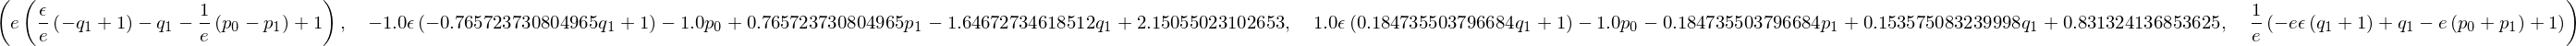

In [22]:
system4 = Tuple(*[expr.subs({i: j, t: extreme_x4[j]}) for j in range(4)]).subs(q0, 1)
system4

In [23]:
sols4 = solve(system4, [p0, p1, q1, epsilon], dict=True)
sols4

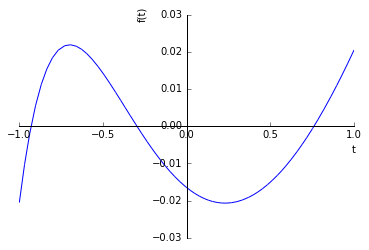

In [24]:
plot(E.subs(sols4[1]), (t, -1, 1))

In [25]:
[E.subs(sols3[1]).subs(t, i).evalf() for i in extreme_x3]

In [26]:
!say done

Another useful resource: http://www.boost.org/doc/libs/1_35_0/libs/math/doc/sf_and_dist/html/math_toolkit/backgrounders/remez.html

> The method usually adopted to solve these equations is an iterative one: we guess the value of E, solve the equations to obtain a new value for E (as well as the polynomial coefficients), then use the new value of E as the next guess. The method is repeated until E converges on a stable value.

> These complications extend the running time required for the development of rational approximations quite considerably. It is often desirable to obtain a rational rather than polynomial approximation none the less: rational approximations will often match more difficult to approximate functions, to greater accuracy, and with greater efficiency, than their polynomial alternatives. For example, if we takes our previous example of an approximation to ex, we obtained 5x10-4 accuracy with an order 4 polynomial. If we move two of the unknowns into the denominator to give a pair of order 2 polynomials, and re-minimise, then the peak relative error drops to 8.7x10-5. That's a 5 fold increase in accuracy, for the same number of terms overall.

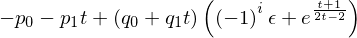

In [78]:
expr = exp(-(-t - 1)/(2*t - 2)) - (p0 + p1*t)/(q0 + q1*t) + (-1)**i*epsilon
expr = expr*(q0 + q1*t)
expr = simplify(expr)
expr

In [79]:
system = Tuple(*[expr.subs({i: j, t: chebyshevt_root(5, 4-j).evalf()}) for j in range(1,5)])

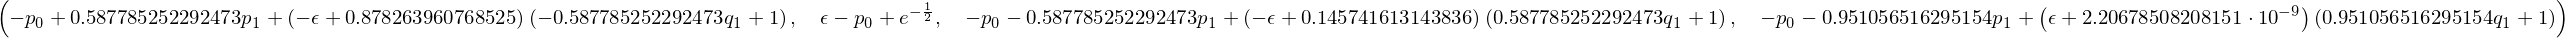

In [80]:
system = system.subs(q0, 1)
system

In [81]:
sols = solve(system, [p0, p1, q1, epsilon], dict=True)
sols

In [83]:
E = exp(-(-t - 1)/(2*t - 2)) - (p0 + p1*t)/(1 + q1*t)

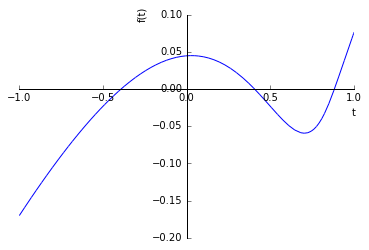

In [85]:
plot(E.subs(sols[0]), (t, -1, 1))

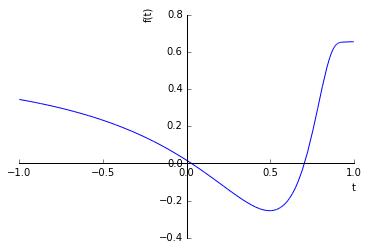

In [92]:
plot(E.subs(sols[0]).diff(t), (t, -1, 1))

In [95]:
print(E.subs(sols[0]).diff(t))

-0.0243197537608033*(-0.636658291554981*t + 0.561884537092944)/(-0.0243197537608033*t + 1)**2 + (-2*(t + 1)/(2*t - 2)**2 + 1/(2*t - 2))*exp((t + 1)/(2*t - 2)) + 0.636658291554981/(-0.0243197537608033*t + 1)


In [102]:
nsolve(diff(E.subs(sols[0]), t), (.5, 0.9), solver='bisect')

mpf('0.70295119676297064')

In [106]:
nsolve(diff(E.subs(sols[0]), t), 0.9)

mpf('0.99996577349047597')

In [104]:
E.subs(sols[0]).diff(t).subs(t, 1)

In [97]:
E.subs(sols[0]).diff(t).subs(t, 0.99996577349047597) 

This is the wrong answer. See https://github.com/sympy/sympy/issues/11768

In [112]:
E.subs(sols[0]).diff(t).subs(t, 0.7)

We have to use the weird wrong solution here, because expr(1) = infinity ???

In [119]:
extreme_x2 = [-1, nsolve(diff(E.subs(sols[0]), t), 0), nsolve(diff(E.subs(sols[0]), t), (0.5, .9), solver='bisect'), nsolve(diff(E.subs(sols[0]), t), 0.9)]
extreme_x2

[-1,
 mpf('0.028158494689863673'),
 mpf('0.70295119676297064'),
 mpf('0.99996577349047597')]

In [120]:
system2 = Tuple(*[expr.subs({i: j, t: extreme_x2[j]}) for j in range(4)]).subs(q0, 1)
system2

In [121]:
sols2 = solve(system2, [p0, p1, q1, epsilon], dict=True)
sols2

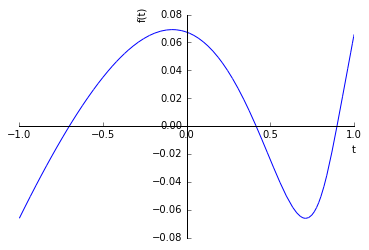

In [122]:
plot(E.subs(sols2[1]), (t, -1, 1))

In [126]:
extreme_x3 = [-1, nsolve(diff(E.subs(sols2[1]), t), -1), nsolve(diff(E.subs(sols2[1]), t), (0.5, 0.9), solver='bisect'), nsolve(diff(E.subs(sols2[1]), t), .9)]
extreme_x3

[-1,
 mpf('-0.085952974958929031'),
 mpf('0.71015320710868727'),
 mpf('0.99996569817644129')]

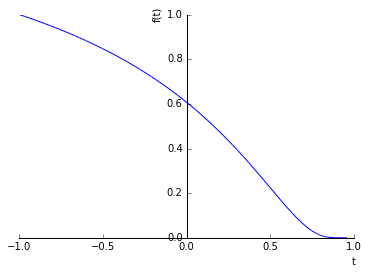

In [128]:
plot(exp(-(-t - 1)/(2*t - 2)), (t, -1, 1))

In [129]:
system3 = Tuple(*[expr.subs({i: j, t: extreme_x3[j]}) for j in range(4)]).subs(q0, 1)
system3

In [130]:
sols3 = solve(system3, [p0, p1, q1, epsilon], dict=True)
sols3

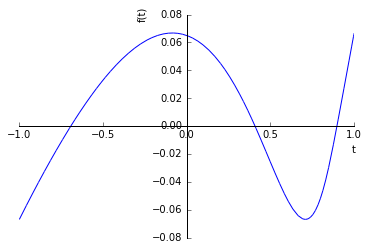

In [133]:
plot(E.subs(sols3[1]), (t, -1, 1))

In [134]:
[E.subs(sols3[1]).subs(t, i).evalf() for i in extreme_x3]

In [135]:
r = (p0 + p1*t)/(1 + q1*t)

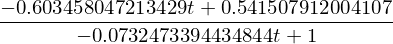

In [137]:
r.subs(sols3[1])

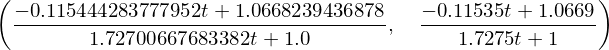

In [170]:
n, d = simplify(r.subs(sols3[1]).subs(t, (2*t - 1)/(2*t + 1))).as_numer_denom()
rat_func = (n/Poly(d).TC())/(d/Poly(d).TC())
correct_rat_func = (1.0669 + -1.1535e-1*t)/(1 + 1.7275*t)
rat_func, correct_rat_func

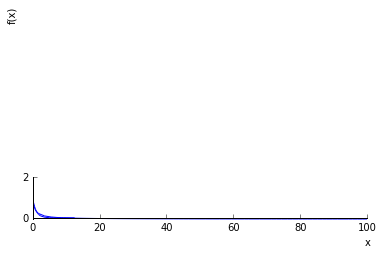

In [171]:
plot((rat_func, (t, 0, 100)), (exp(-t), (t, 0, 100)), ylim=(-1, 10))

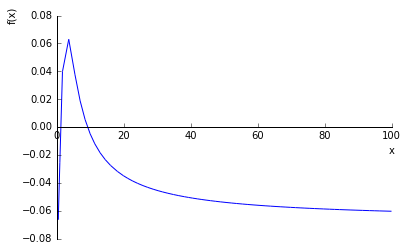

In [172]:
plot((correct_rat_func - exp(-t), (t, 0, 100)))

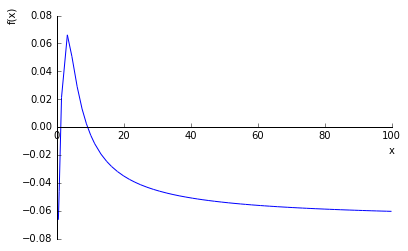

In [173]:
plot((rat_func - exp(-t), (t, 0, 100)))

That's it!!!

In [ ]:
N = symbols("N")
x = symbols("x", real=True)
phi = N*(0.1309 - 0.1149*x**2 + I*0.2500*x)

In [ ]:
phi.subs(N, 4).as_real_imag()

In [ ]:
from sympy.plotting import *
plot_parametric(*phi.subs(N, 4).as_real_imag())